# Comparing the means of two populations

<div class="alert alert-success">

**Before completing this week's Self-study Notebook (there is only one) you must complete the [Ladybird Analysis 1 - Estimating a population mean Notebook.](../Ladybird%20Analysis%20Notebooks/Ladybird%20Analysis%201%20-%20Estimating%20a%20population%20mean.ipynb)**
    
</div>

<div class="alert alert-warning">

**In this notebook you will learn**

- what Null Hypothesis Significance Testing (NHST) is and the theory behind it
- how to perform a two-sample *t*-test in Python to see if the means of two populations are equal or not
- how to report the outcome of a *t*-test 
    
</div>

Last week we introduced inferential statistics: the collection of methods used to make conclusions about one or more populations based on samples drawn from them. We then looked at how to estimate a population mean and calculate its precision. This week we'll look at how to compare the means of two populations to see if they are the same or different?

The commonest way of doing this in the Bio, Geo and Medical Sciences is called **null hypothesis significance testing**, or NHST for short. This forbidding name hides the fact that actually performing statistical tests is rather easy. NHST is not the only inferential method. And in recent years there have been growing critcisms of it and calls for adopting other methods. But it is the method many biologists have been taught and have used for over half a century as it is fairly easy to apply, especially with specialised computer software. It is the method you will see most often in published scientific papers. So it is the one method you need to know about. We do not have time in this course to introduce other statistical methods.

To develop the ideas behind NHST we will use an example of the evolution of beak depths of medium ground finches.

## The evolution of medium ground finch beak depths on the Galápagos islands

Peter and Rosemasry Grant and their colleagues have studied Galápagos finch species every year since 1976. One such species is the medium ground finch on the Galápagos island of Daphne Major.
<br>
<br>
<div>
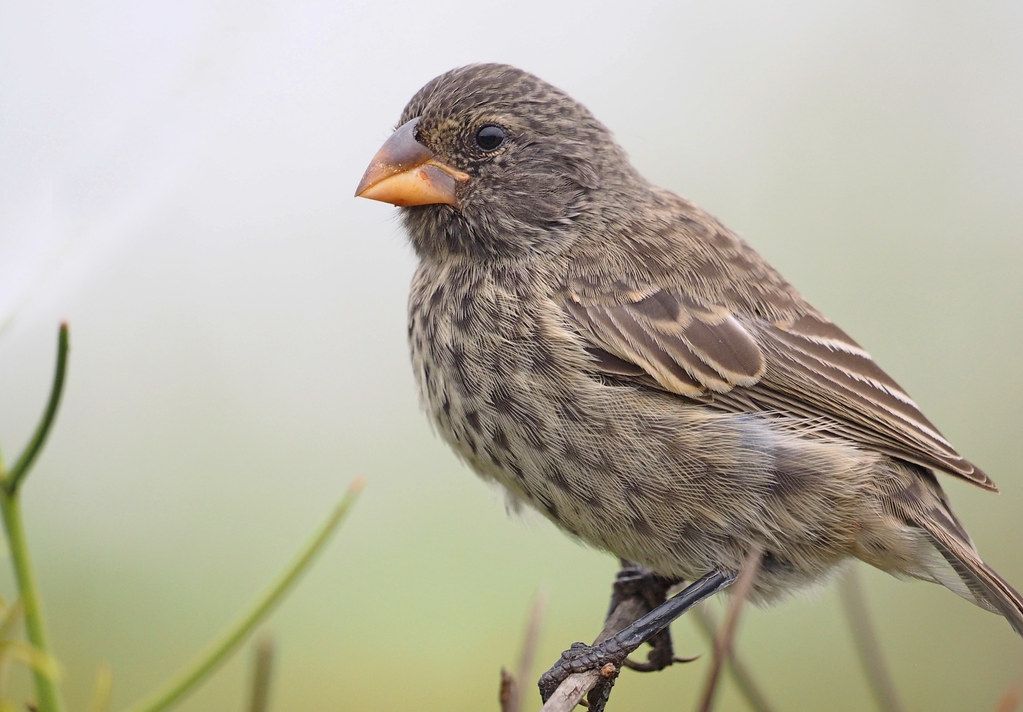
</div>

The medium ground finch feeds on seeds. The finches have inherited variation in beak shape with some individuals having wide, deep beaks and others having thinner, shallower beaks. Large-beaked birds feed more efficiently on large, hard seeds, whereas smaller-beaked birds feed more efficiently on small, soft seeds. 

During 1977 a drought altered vegetation on the island. After the drought the number of seeds declined dramatically. The decline was greater in small, soft seeds than in large, hard seeds. Therefore, the Grants and colleagues hypothesised that large-beaked birds were better able to survive the drought than the small-beaked birds. 

As beak size is inherited from parent to offspring the theory of natural selection predicts that the drought would cause selection for finches with larger beaks. We can test this hypothesis by comparing average beak sizes of medium ground finches on Daphne Major before (1976) and after (1978) the drought.

The beak depth data collected by the Grants are in the file `Datasets/finches beak depth.csv`. We looked at the 1976 beak depths last week. Now we want to compare beak depths from both years.

## The research hypothesis

The Grants formalised their idea in something called a **research hypothesis** (also called a biological hypothesis).

<div class="alert alert-success">

**Research hypothesis**: The 1977 drought on Daphne Major caused the evolution of inherited beak depths in the medium ground finch.
    
</div>

This is a statement that links cause and effect of natural phenomena: drought caused the evolution (change) of beak depths. 

Having come up with a hypothesis the Grants set out to challenge it by collecting evidence in the form of data.

## The statistical hypotheses

Having defined a research hypothesis, the Grants formulated two **statistical hypotheses**. The names of the two statistical hypotheses are the **null hypothesis** and the **alternative hypothesis**. The null hypothesis is usually written as *H*<sub>0</sub> and the alternative hypothesis is usually written as *H*<sub>1</sub> or *H*<sub>A</sub>.

The data that the Grants collected were beak depths (in millimetres) of 75 medium ground finches in 1976 and 60 medium ground finches in 1978. If the Grants' research hypothesis were wrong - that the drought had no effect on beak depths - then we might expect that mean beak depth didn't change from 1976 to 1978, i.e., mean beak depth in 1976 is **the same** as the mean beak depth in 1978. This is the null hypothesis: the hypothesis that nothing has changed, or some characteristic of two populations is the same.

<div class="alert alert-success">

**Null hypothesis *H*<sub>0</sub>**: Mean beak depth in 1976 is **the same** as mean beak depth 1978.

</div>

Alternatively, if the research hypothesis were true we might expect that the mean beak depth in 1976 to be **different** from the mean beak depth 1978. This is the alternative hypothesis: the hypothesis that something has changed, or some characteristic of two populations is different.

<div class="alert alert-success">

**Alternative hypothesis *H*<sub>A</sub>**: Mean beak depth in 1976 is **different** from mean beak depth 1978.
    
</div>

The null and alternative hypotheses are specific claims about the two populations: the population of finch beak depths in 1976 and the population of finch beak depths in 1978.

Notice that the alternative hypothesis only refers to a **difference** in beak depths. It doesn't say anything about how big that difference is, nor in which direction it occurred; whether beak depths were larger or smaller in 1978 than in 1976. Null hypothesis testing by itself is only concerned with testing whether a difference exists or not. It is not concerned about the size and direction of that difference.

Let's write the population mean beak depths in mathematical symbols for brevity and clarity.

<div class="alert alert-success">

Let the population mean beak depth in 1976 be $\mu_\text{1976}$

Let the population mean beak depth 1978 be $\mu_\text{1978}$

</div>

Now we can write the null and alternative hypotheses succinctly in terms of population parameters.

<div class="alert alert-success">


*H*<sub>0</sub>:  $\mu_\text{1976} = \mu_\text{1978}$.

*H*<sub>A</sub>:  $\mu_\text{1976} \ne \mu_\text{1978}$.

</div>
    
Now here's the crazy thing: We completely ignore the alternative hypothesis from here on in. We don't care about it. All we care about is testing the null hypothesis *H*<sub>0</sub>; we only care about testing if finch beak depths are on average unchanged from 1976 to 1978. Null hypothesis significance testing is designed to challenge or “reject” the null hypothesis. (The alternative hypothesis is used in the design of experiments and for determining sample sizes, but we won't consider these issues further in this course.) And this is why this statistical procedure is called **null hypothesis** significance testing.

## First plot the data

Before we go any further, let's look at the beak depth data the Grants collected.

The file `finches beak depth.csv` contains the beak depths from 1976 and 1978.

<div class="alert alert-info">

Run the following code cell to plot frequency distributions of medium ground finch beak depths sampled from Daphne Major in 1976 and 1978.
</div>

In [ ]:
import pandas as pd
import seaborn as sns

# Read in the medium ground finch beak depths dataset on Daphne Major in 1976 and 1978
beak_depth = pd.read_csv('Datasets/finches beak depth.csv')

# Plot histograms of beak depths in a single figure to enable comparison
g = sns.displot(beak_depth)

# Add some annotation
g.ax.set_xlabel('Beak depth (mm)')
g.ax.set_ylabel('Number of finches')
g.ax.set_title('Frequency distributions of medium ground finch\nbeak depths on Daphne Major in 1976 and 1978')
g.legend.set_title('Year')
beak_depth

The blue histogram shows beak depths in 1976, and the orange histogram shows beak depths in 1978. The histograms  overlap substantially (shown by the grey-ish parts of the bars) so it's hard to tell if there is a difference.

<div class="alert alert-info">

Let's try plotting the beak depths in a box plot. Run the following code cell.
</div>

In [ ]:
g = sns.catplot(data=beak_depth, kind='box')

# Add some annotation
g.ax.set_ylabel('Beak depth (mm)')
g.ax.set_xlabel('Year')
g.ax.set_title('Distributions of medium ground finch\nbeak depths on Daphne Major in 1976 and 1978');

It looks as if the mean beak depth in 1976 is slightly shorter by about half a millimetre than in 1978.
 
But, as we saw last week when we talked about sampling distributions, every time we randomly sample a population we get a different set of finches resulting in different sample means that can vary quite a lot. So it's not clear if the difference in the sample mean beak depths we observe in the above plots is due to a real difference in population mean beak depths or that there is no difference in the populations and the difference in the samples is due solely to random sampling.

This is an example where inferential statistics is needed to determine if there is a difference or not between the two population means.

## Sample means and standard deviations

First let's calculate the sample means and standard deviations. Let the sample means for the two years be $\bar{x}_\text{1976}\ $ and $\bar{x}_\text{1978}\ $ and the sample standard deviations be $s_\text{1976}\ $ and $s_\text{1978}\ $.

<div class="alert alert-info">

Run the code cell below to find the sample sizes, means and standard deviations. 
    
Notice that we have used `.round(2)` to round to 2dp. We cannot use f-strings with the formatting `:.2f` when outputting descriptive statistics for more than one variable from a pandas DataFrame. 
</div>

In [ ]:
n = beak_depth.count()
xbar = beak_depth.mean()
s = beak_depth.std()

print('Sample sizes, n')
print(n)
print() # Blank line

print('Sample means to 2dp, xbar')
print(xbar.round(2))
print() # Blank line

print('Sample standard deviations to 2dp, s')
print(s.round(2))

In 1976 seventy-five finches were sampled and in 1978 sixty finches were sampled. (Ignore the `dtype` line).

The standard deviations are roughly similar at about 0.9 mm. This is not unexpected as the histograms and boxplots showed similar variability (spread) between the two years.

Now let's calculate the difference in the sample means.

<div class="alert alert-info">

Run the code cell below.
</div>

In [ ]:
print(xbar['1978'] - xbar['1976'])

The mean beak depth in 1978 is about half a millimetre longer than in 1976 (9.98 $-$ 9.49 = 0.49 mm). Which is what we expected from the boxplots.

## The standard errors of the means

It will be useful to calculate the standard errors of the means (SEM). Remember these tell us how precise our estimates of the population means are. Recall that the approximate SEM is given by the formula

$$\text{SEM} \approx \frac{s}{\sqrt n}$$


<div class="alert alert-info">

Run the code cell below to find the standard errors. We import the square root function from a module called numpy (a bit like the math module but better).
    
</div>

In [ ]:
from numpy import sqrt # use the numpy module for sqrt as the math module doesn't work on DataFrames

SEM = s/sqrt(n)

SEM.round(2)

Both come out as 0.11 mm rounded to 2dp. Remember that this means our estimates of the population means have a precision of about a tenth a millimetre. That is quite impressive if you think about it given that finch beak depths vary from about 7 mm to 12 mm. This is all because the sample sizes are large.

Our estimates of the 1976 and 1978 population mean beak depths are 9.49$\pm$0.11 mm and 9.98$\pm$0.11 mm, respectively.

## The test statistic

We've calculated the sample mean beak depths and found they differ by 0.49 mm.

Is this a real difference in ground finch beak depths caused by the drought in 1977? Or, is there no real difference
and is the difference of 0.49 mm we observe just because we have randomly sampled small subsets of finches in the two years? Is it real or just random chance?

NHST allows us to answer that question. The first step in this procedure is to chose what's called a **test statistic**. 

Test statistics are at the heart of NHST. A test statistic is a number that measures some difference between two or more samples drawn from their respective populations.

Remember a "statistic" is something derived from a sample. For instance, the sample mean, $\bar{x}$, and the sample standard deviation, $s$, are descriptive statistics of a single sample. Similarly a "test statistic" is something derived from one or more samples that is used to **test** a null hypothesis. 

Fortunately, clever mathematicians have come up with a whole range of test statistics depending on the type of data we have and the question we want to ask. When comparing the means of two populations the test statistic we need is called *t* (we don't need to know why it's called *t*, it's just a name). And the test we perform is called a **two-sample t-test** ("two-sample" because, obviously, we have two samples, one from 1976 and the other from 1978).

How is *t* calculated? The actual formula for *t* is quite complicated but, put simply, it is the difference in the estimated population means divided by the variability in the population means:

$$t = \frac{\text{difference in population mean estimates}}{\text{variability in population mean estimates}}$$

The population mean estimates are simply the sample means $\bar{x}_\text{1976}$ and $\bar{x}_\text{1978}$. Therefore,

$$\text{difference in population mean estimates} = \bar{x}_\text{1978} - \bar{x}_\text{1976} = \text{difference in sample means}$$

So we can rewrite the formula for *t* like so:

$$t = \frac{\text{difference in sample means}}{\text{variability in population mean estimates}}$$

So *t* is directly proportional to the difference in the sample means. The larger the difference in the sample means the larger *t* becomes. 

In the formula for *t* we see that it is inversely proportional to the variability in the population mean estimates. The lower the variability in our estimates, or, equivalently, the higher the precision, the higher *t* becomes. This variability is a complicated formula of the standard errors of the two samples. For our purposes we don't need to know what the formula is, just that lower SEMs (higher precisions) cause higher values of *t*. 

You can see that the higher the value of *t* the more likely we will be able to tell that the 1976 and 1978 population means differ. Or put another way: high *t* means we are confident of a real difference between the population means, low *t* means we cannot be confident of a real difference and the observed difference is likely due to random chance.

<div class="alert alert-info">

In the interactive plot below you can play around with the characteristics of the beak depth data from both years. You can change the means and standard deviations of the sample of data, and you can change the sample sizes by moving the sliders. 

Note what happens to the value of *t* as you move the two samples closer toegther or further apart, or change their spread or change their sample sizes.
    
The estimates of the population means are represented by the horizontal coloured bars above the histograms.

Ignore *p*, we will talk about that in a moment.
    
</div>

In [ ]:
%matplotlib widget
from interactive_plots import nhst
nhst();

By moving the sliders you should convince yourself that the higher the value of *t* the more confident you can be that the population mean beak depths differ between 1976 and 1978. The more confident you can be that the 1977 drought has caused a change in beak depths. 

Conversely, *t* is low when the difference in the histograms overlap substantially, when the beak depths are highly variable, and when the sample sizes are small.

## The *p*-value

The actual value of *t* for the Daphne Major medium ground finches is 3.18 (you'll see how to calculate it in a moment). How do we use that value to tell us if the 1977 drought caused a difference in beak depths? To answer that we need to go back to our null hypothesis:

<div class="alert alert-success">

**Null hypothesis *H*<sub>0</sub>**: Mean beak depth in 1976 is **the same** as mean beak depth 1978.

</div>

Using the method of NHST we ask the following question:

<div class="alert alert-success">

Is a value of *t* of at least 3.18 probable assuming the null hypothesis were true?
    
</div>

What we're doing here is the following:
1. Assuming that the null hypothesis were true (i.e., assume no difference between population means).
2. Calculating the probability of getting a value of *t* of at least 3.18 assuming the null hypothesis were true. This probability is called a *p*-value.
3. Based on the *p*-value, make a decision on whether to reject the null hypothesis.

If a value of *t* of at least 3.18 is probable under the null hypothesis then we cannot reject the null hypothesis in favour of the alternative hypothesis.

If a value of *t* of at least 3.18 is unlikely under the null hypothesis then we can accept the alternative hypothesis in favour of the null hypothesis

This is how we do this on the computer.

## The two-sample *t*-test

To perform a two sample *t*-test in Python we need to import the code that performs the test from the `scipy.stats` module.

<div class="alert alert-info">

1. Read the code so that you understand what it does.
2. Run the code cell to perform the t-test.
</div>

In [ ]:
from scipy.stats import ttest_ind # import the two sample t-test function

# Perform the two sample t-test
# Include nan_policy='omit' because there are missing values in the 1978 data that need to be ignored. Without this the test won't work.
t, p = ttest_ind( beak_depth['1978'], beak_depth['1976'], nan_policy='omit' )


# Print t 2dp
print(f't = {t:.2f}')

# Print the p-value to 4dp
print(f'p-value = {p:.4f}')

The two sample *t*-test is performed by the function `ttest_ind()`. The beak depths of the two samples are passed to the function and it returns the values of *t* and *p*. All of the hard calculations and complicated maths are done for you by the computer.

It's as simple as that.

The result is saying that the probability of the value of *t* being at least 3.18 is 0.0019 (about 1 in 500) if the null hypothesis were true, i.e., very unlikely. Which means it is very unlikely that the population mean beak depths of the 1976 and 1978 finches are the same.

## To reject or not reject the null hypothesis

Recall that null hypothesis significance testing is designed to challenge or “reject” the null hypothesis. We are not testing the alternative hypothesis.

<div class="alert alert-success">

If a test statistic is inconsistent with the prediction of the null hypothesis (i.e., when the *p*-value is small) then we **reject the null hypothesis**. 
    
</div>

This begs the question of how inconsistent does the test statistic have to be? There is no right or wrong answer to that question. Which means we have to rely on convention. In biology and medicine the convention is that when the *p*-value is below 0.05 of 5% then the test statistic is considered inconsistent with the null hypothesis. And this means we reject the null hypothesis. 

This value of 0.05 is called **the significance level** and is usually denoted by the greek letter $\alpha$ (alpha). So in biology and medicine the conventional significance level of null hypothesis significance testing is $\alpha$ = 0.05. 

We have calculated a *p*-value of 0.0019 which is below $\alpha$ = 0.05. So, by convention, we reject the null hypothesis.

Note that we cannot prove that the alternative hypothesis is true. The best we can do is show that the data are unlikely under the null hypothesis, and, therefore, likely under the alternative hypothesis.

<div class="alert alert-success">

If a test statistic is consistent with the prediction of the null hypothesis then we **fail to reject the null hypothesis**. 

</div>

This happens when the *p*-value is greater than $\alpha$ = 0.05.

Failing to reject the null hypothesis doesn't mean we accept it. Accepting the null hypothesis implies that we accept that no difference exists. But there could be one of several reasons why we didn't find a difference:
1. The sample sizes were too small to detect a difference.
2. The variability in the data was too high. The difference exists, but the variability in the data swamped the difference.
3. When dealing with random samples, chance always plays a role in the results. The luck of the draw might have caused the samples not to reflect a real difference that exists between populations.

## Reporting the result of the test

Finally, after collecting beak depth data, performing a *t*-test and rejecting the null hypothesis the researchers need to publish and report their results. This is how they might report it:

<div class="alert alert-success">

"Beak depths of medium ground finches were measured on the Galápagos island of Daphne Major in 1976 and 1978.    A significant difference was found of 0.49 mm between beak depths in the two years (*t* = 3.18, *p* = 0.0019). This evidence supports the hypothesis that the 1977 drought caused selection for larger beaks on Daphne Major."
</div>

When a null hypothesis is rejected then the result is said to be **statistically significant** or just **significant**. Do not read too much in to the word "significant". Significant does not mean "important" as it does in English. In statistics it means that an observed difference between two or more populations is unlikely under the null hypothesis.

When a null hypothesis is not rejected then the result is said to be **not statistically significant** or **non-significant**. 

## Common misinterpretations of the *p*-value

The *p*-value is the probability of getting a test statistic that is at least as unusual as the one you observed in your experiment or observational study if the null hypothesis were true. 

Once you've calculated your *p*-value from your data and chosen a significance level (conventionally $\alpha$ = 0.05) there are only **two** things your are allowed to say:
1. If *p* < 0.05, you found a statistically significant result and you reject the null hypothesis, or
2.  if *p* > 0.05, you found a non-statistically significant result and you fail to reject the null hypothesis.

That's it! You cannot make any more claims about your data and results than that. 

The most common misinterpretation of the *p*-value is that it is the probability of the null hypothesis being true. It is not! For the simple reason that the *p*-value is calculated assuming the null hypothesis is already true. 

Other misinterpretations occur when *p* is just above significance, say 0.06. Although you maybe tempted to, you cannot say any of the following:

1. The collection of more data will make the result significant (i.e., *p* will drop below 0.05).
    
    - This comment is often seen in final year Honours project reports. In fact, there is no guarantee that more data will make a non-significant result significant. (Moreover, it is possible that more data can even make a significant result non-significant.)

2. There is a trend to significance.

    - This is sometimes seen in scientific papers. Again the suggestion is that more data will make a non-significant result significant.

## Exercise Notebook

[Comparing two population means](Exercises/4.1%20-%20Comparing%20two%20population%20means.ipynb)